In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 76 bytes


In [ ]:
!kaggle datasets download -d vuppalaadithyasairam/bone-fracture-detection-using-xrays

 95% 164M/172M [00:01<00:00, 133MB/s]
100% 172M/172M [00:01<00:00, 120MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "/content/bone-fracture-detection-using-xrays.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from zipfile import ZipFile

<ipython-input-4-36398ed231ac>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random
import PIL
import PIL.Image

In [ ]:
test_loc='/content/archive (6)/val'
train_loc='/content/archive (6)/train'

In [ ]:
#dataset loader
import tensorflow
from tensorflow.keras.preprocessing import image_dataset_from_directory

image_size=(96,96)
batch_size=10

train_dataset=image_dataset_from_directory(train_loc,
                                           batch_size=batch_size,
                                           image_size=image_size,
                                           validation_split=0.2,
                                           subset="training",
                                           shuffle=True,
                                           seed=42)


test_dataset=image_dataset_from_directory(test_loc,
                                           batch_size=batch_size,
                                           image_size=image_size,
                                           shuffle=True,
                                           seed=42)

Found 8863 files belonging to 2 classes.
Using 7091 files for training.
Found 600 files belonging to 2 classes.


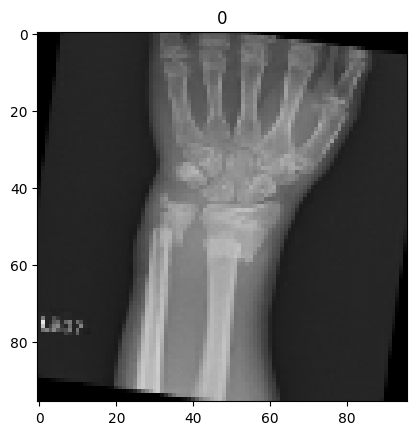

In [ ]:
for images,labels in train_dataset.take(1):

    random_idx=random.randint(0,batch_size-1)

    random_image=images[random_idx]
    random_label=labels[random_idx]

    plt.imshow(random_image.numpy().astype("uint8"))
    plt.title(random_label.numpy())
    plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define directories for train and test
train_data_dir = 'path/to/train'
test_data_dir = 'path/to/test'

# Define image size and batch size
image_size = (96, 96)
batch_size = 10

# Load train dataset with subfolders
train_dataset = image_dataset_from_directory(
    train_data_dir,
    batch_size=batch_size,
    image_size=image_size,
    validation_split=0.2,
    subset="training",
    seed=42,
    label_mode='binary'  # We assume binary classification
)

# Load validation dataset with subfolders
val_dataset = image_dataset_from_directory(
    train_data_dir,
    batch_size=batch_size,
    image_size=image_size,
    validation_split=0.2,
    subset="validation",
    seed=42,
    label_mode='binary'  # We assume binary classification
)

# Load test dataset with subfolders
test_dataset = image_dataset_from_directory(
    test_data_dir,
    batch_size=batch_size,
    image_size=image_size,
    seed=42,
    label_mode='binary'  # We assume binary classification
)

# Define Swin Transformer backbone
backbone = tf.keras.applications.SwinTransformer(
    input_shape=(96, 96, 3),
    include_top=False,
    pretrained=True,
    classes=2  # Assuming binary classification
)

# Freeze the backbone layers
backbone.trainable = False

# Add classification head
inputs = tf.keras.Input(shape=(96, 96, 3))
x = backbone(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Create model
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=20)

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_dataset)
print(f'Test accuracy: {test_acc}')

# Get predictions for the test dataset
test_predictions = model.predict(test_dataset)
test_labels = np.concatenate([y for x, y in test_dataset], axis=0)

# Calculate classification metrics
test_pred_labels = np.where(test_predictions > 0.5, 1, 0)
print("Classification Report for Test Dataset:")
print(classification_report(test_labels, test_pred_labels))

# Plot confusion matrix
cm = confusion_matrix(test_labels, test_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Test Dataset')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


NotFoundError: Could not find directory path/to/train

In [ ]:
!pip install timm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylin

Found 7091 images belonging to 2 classes.
Found 1772 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Epoch 1/20
221/221 [==============================] - 206s 896ms/step - loss: 0.7114 - accuracy: 0.4988 - val_loss: 0.6933 - val_accuracy: 0.5045
Epoch 2/20
221/221 [==============================] - 128s 578ms/step - loss: 0.6957 - accuracy: 0.4977 - val_loss: 0.6931 - val_accuracy: 0.5063
Epoch 3/20
221/221 [==============================] - 128s 582ms/step - loss: 0.6932 - accuracy: 0.5026 - val_loss: 0.6931 - val_accuracy: 0.5034
Epoch 4/20
221/221 [==============================] - 110s 496ms/step - loss: 0.6932 - accuracy: 0.5045 - val_loss: 0.6931 - val_accuracy: 0.5057
Epoch 5/20
221/221 [==============================] - 131s 592ms/step - loss: 0.6931 - accuracy: 0.5050 - val_loss: 0.6931 - val_accuracy: 0.5057
Epoch 6/20
221/221 [==============================] - 128s 580ms/step - loss: 0.6932 - accuracy: 0.5019 - val_loss: 0.6931 - val_accuracy: 0.5063

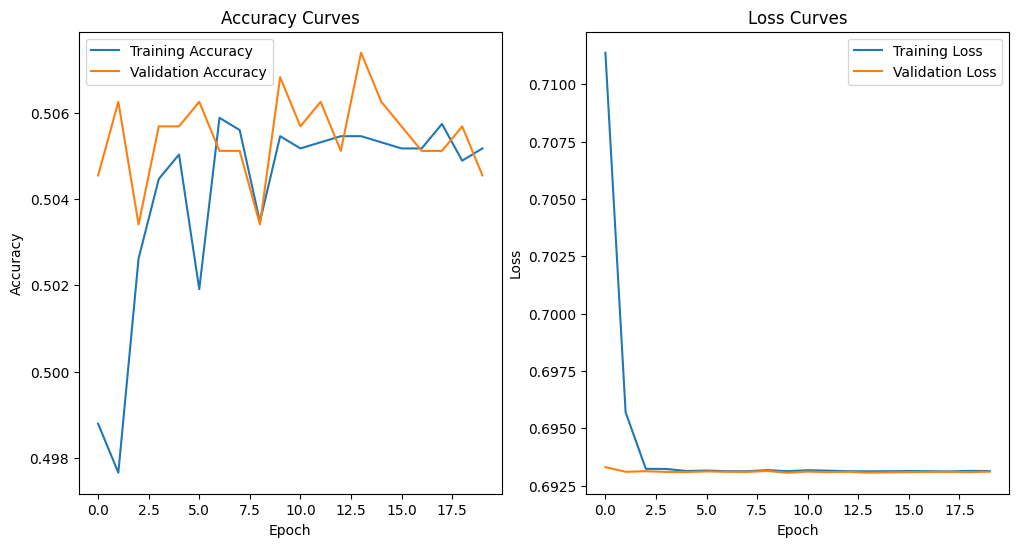

19/19 [==============================] - 3s 147ms/step - loss: 0.6916 - accuracy: 0.6000
Test accuracy: 0.6000000238418579
19/19 [==============================] - 3s 74ms/step
Classification Report for Test Dataset:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       360
           1       0.00      0.00      0.00       240

    accuracy                           0.60       600
   macro avg       0.30      0.50      0.37       600
weighted avg       0.36      0.60      0.45       600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


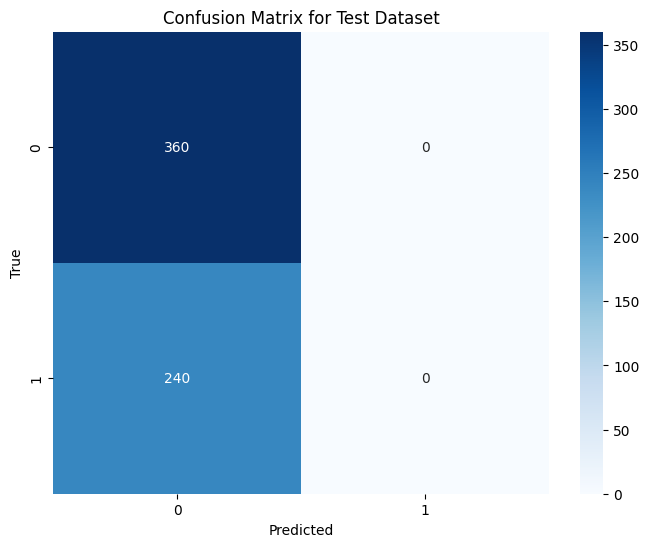

In [ ]:
#EfficientNetB0 - may 2019
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential

def load_data(train_dir, test_dir, image_size=(224, 224), batch_size=32, epochs=10):
    # Define data generators for train and test
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
    )

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training'
    )

    val_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation'
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary'
    )

    return train_generator, val_generator, test_generator

def build_model(input_shape=(224, 224, 3)):
    backbone = EfficientNetB0(input_shape=input_shape, include_top=False, weights='imagenet')
    backbone.trainable = False

    model = Sequential([
        backbone,
        GlobalAveragePooling2D(),
        Dense(1024, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

def train_model(model, train_generator, val_generator, epochs=10):
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        epochs=epochs,
        validation_data=val_generator,
        validation_steps=val_generator.samples // val_generator.batch_size
    )

    return history

def evaluate_model(model, test_generator):
    test_loss, test_acc = model.evaluate(test_generator)
    print(f'Test accuracy: {test_acc}')

    predictions = model.predict(test_generator)
    y_pred = np.where(predictions > 0.5, 1, 0)
    y_true = test_generator.classes[:len(y_pred)]

    print("Classification Report for Test Dataset:")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title('Confusion Matrix for Test Dataset')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def plot_metrics(history):
    plt.figure(figsize=(12, 6))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curves')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Curves')
    plt.legend()

    plt.show()

def main():
    train_dir = '/content/archive (6)/train'
    test_dir = '/content/archive (6)/val'

    train_generator, val_generator, test_generator = load_data(train_dir, test_dir)
    model = build_model()

    # Set the number of epochs to 20
    epochs = 20

    history = train_model(model, train_generator, val_generator, epochs=epochs)

    # Plot accuracy and loss curves
    plot_metrics(history)

    evaluate_model(model, test_generator)

if __name__ == "__main__":
    main()


Found 7091 images belonging to 2 classes.
Found 1772 images belonging to 2 classes.
Epoch 1/20
221/221 [==============================] - 160s 599ms/step - loss: 0.7190 - accuracy: 0.5132 - val_loss: 0.7189 - val_accuracy: 0.4926
Epoch 2/20
221/221 [==============================] - 111s 502ms/step - loss: 0.6957 - accuracy: 0.4964 - val_loss: 0.6936 - val_accuracy: 0.5051
Epoch 3/20
221/221 [==============================] - 130s 588ms/step - loss: 0.6937 - accuracy: 0.4936 - val_loss: 0.6931 - val_accuracy: 0.5080
Epoch 4/20
221/221 [==============================] - 131s 593ms/step - loss: 0.6933 - accuracy: 0.5055 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 5/20
221/221 [==============================] - 112s 508ms/step - loss: 0.6932 - accuracy: 0.5056 - val_loss: 0.6931 - val_accuracy: 0.5051
Epoch 6/20
221/221 [==============================] - 112s 508ms/step - loss: 0.6931 - accuracy: 0.5056 - val_loss: 0.6931 - val_accuracy: 0.5057
Epoch 7/20
221/221 [====================

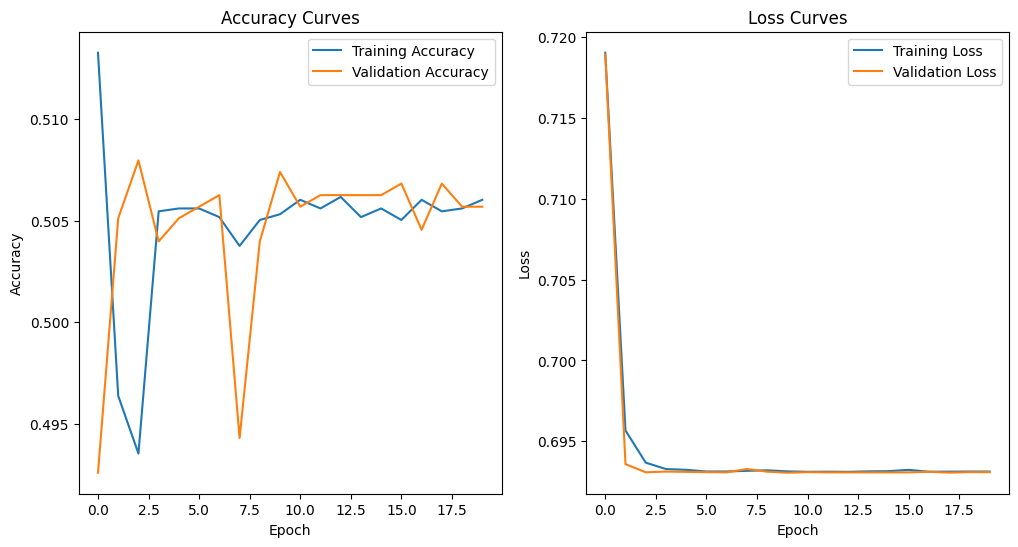

56/56 [==============================] - 26s 435ms/step
Classification Report for Validation Dataset:
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       896
           1       0.00      0.00      0.00       876

    accuracy                           0.51      1772
   macro avg       0.25      0.50      0.34      1772
weighted avg       0.26      0.51      0.34      1772



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


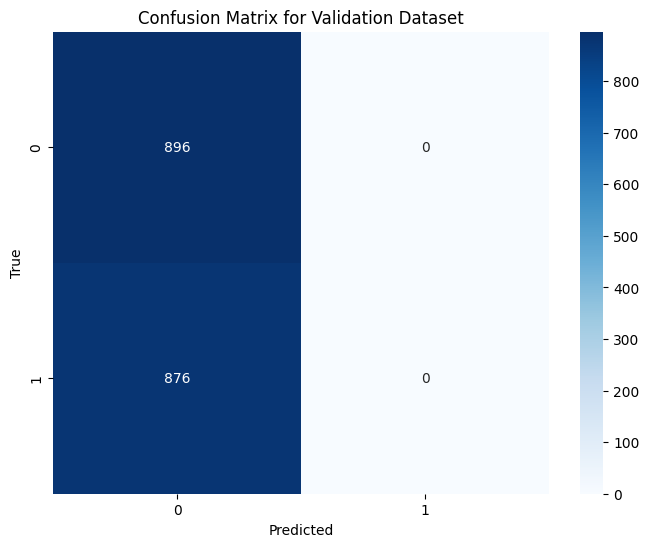

In [ ]:
#EfficientNetB0
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

def load_data(train_dir, validation_dir, image_size=(224, 224), batch_size=32):
    # Load training data
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
    )

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training'
    )

    validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation'
    )

    return train_generator, validation_generator

def build_model(input_shape=(224, 224, 3)):
    backbone = EfficientNetB0(input_shape=input_shape, include_top=False, weights='imagenet')
    backbone.trainable = False

    model = Sequential([
        backbone,
        GlobalAveragePooling2D(),
        Dense(1024, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

def train_model(model, train_generator, validation_generator, epochs=10):
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // validation_generator.batch_size
    )

    return history

def evaluate_model(model, validation_generator):
    predictions = model.predict(validation_generator)
    y_pred = np.where(predictions > 0.5, 1, 0)
    y_true = validation_generator.classes[:len(y_pred)]

    print("Classification Report for Validation Dataset:")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title('Confusion Matrix for Validation Dataset')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def plot_metrics(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curves')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Curves')
    plt.legend()

    plt.show()

def main():
    train_dir = '/content/archive (6)/train'
    validation_dir = '/content/archive (6)/val'

    train_generator, validation_generator = load_data(train_dir, validation_dir)
    model = build_model()

    epochs = 20  # Increase epochs for more training
    history = train_model(model, train_generator, validation_generator, epochs=epochs)

    plot_metrics(history)

    evaluate_model(model, validation_generator)

if __name__ == "__main__":
    main()


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from vit_keras import vit

def load_data(train_dir, validation_dir, image_size=(224, 224), batch_size=32):
    # Load training data
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
    )

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training'
    )

    validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation'
    )

    return train_generator, validation_generator

def build_model(input_shape=(224, 224, 3)):
    model = Sequential([
        vit.ViT(
            image_size=(224, 224),
            patch_size=16,
            num_classes=2,
            dim=1024,
            depth=6,
            heads=16,
            mlp_dim=2048,
            name='vit'
        ),
        GlobalAveragePooling2D(),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

def train_model(model, train_generator, validation_generator, epochs=10):
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // validation_generator.batch_size
    )

    return history

def evaluate_model(model, validation_generator):
    predictions = model.predict(validation_generator)
    y_pred = np.where(predictions > 0.5, 1, 0)
    y_true = validation_generator.classes[:len(y_pred)]

    print("Classification Report for Validation Dataset:")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title('Confusion Matrix for Validation Dataset')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def plot_metrics(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curves')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Curves')
    plt.legend()

    plt.show()

def main():
    train_dir = '/content/archive (6)/train'
    validation_dir = '/content/archive (6)/val'

    train_generator, validation_generator = load_data(train_dir, validation_dir)
    model = build_model()

    epochs = 80  # Increase epochs for more training
    history = train_model(model, train_generator, validation_generator, epochs=epochs)

    plot_metrics(history)

    evaluate_model(model, validation_generator)

if __name__ == "__main__":
    main()


Found 7091 images belonging to 2 classes.
Found 1772 images belonging to 2 classes.


AttributeError: module 'vit_keras.vit' has no attribute 'ViT'

In [ ]:
pip install vit-keras

In [ ]:
pip install --upgrade vit-keras

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

def load_data(train_dir, test_dir, image_size=(224, 224), batch_size=32, epochs=10):
    # Define data generators for train and test
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
    )

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training'
    )

    val_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation'
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary'
    )

    return train_generator, val_generator, test_generator

def build_model(input_shape=(224, 224, 3)):
    backbone = EfficientNetB0(input_shape=input_shape, include_top=False, weights='imagenet')
    backbone.trainable = False

    model = Sequential([
        backbone,
        GlobalAveragePooling2D(),
        Dense(1024, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

def train_model(model, train_generator, val_generator, epochs=10):
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        epochs=epochs,
        validation_data=val_generator,
        validation_steps=val_generator.samples // val_generator.batch_size,
        callbacks=[early_stopping]
    )

    return history

def evaluate_model(model, test_generator):
    test_loss, test_acc = model.evaluate(test_generator)
    print(f'Test accuracy: {test_acc}')

    predictions = model.predict(test_generator)
    y_pred = np.where(predictions > 0.5, 1, 0)
    y_true = test_generator.classes[:len(y_pred)]

    print("Classification Report for Test Dataset:")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title('Confusion Matrix for Test Dataset')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def plot_metrics(history):
    plt.figure(figsize=(12, 6))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curves')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Curves')
    plt.legend()

    plt.show()

def plot_early_stopping(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.scatter(history.epoch, history.history['val_loss'], marker='x', color='r', label='Early Stopping')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Early Stopping')
    plt.legend()
    plt.show()

def main():
    train_dir = '/content/archive (6)/train'
    test_dir = '/content/archive (6)/val'

    train_generator, val_generator, test_generator = load_data(train_dir, test_dir)
    model = build_model()

    # Set the number of epochs to 25
    epochs = 25

    history = train_model(model, train_generator, val_generator, epochs=epochs)

    # Plot accuracy and loss curves
    plot_metrics(history)

    evaluate_model(model, test_generator)

    # Plot early stopping
    plot_early_stopping(history)

if __name__ == "__main__":
    main()


Found 7091 images belonging to 2 classes.
Found 1772 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
16705208/16705208 [==============================] - 2s 0us/step
Epoch 1/25
221/221 [==============================] - 148s 619ms/step - loss: 0.7189 - accuracy: 0.5042 - val_loss: 0.7001 - val_accuracy: 0.4920
Epoch 2/25
221/221 [==============================] - 132s 599ms/step - loss: 0.6992 - accuracy: 0.4974 - val_loss: 0.6933 - val_accuracy: 0.4943
Epoch 3/25
221/221 [==============================] - 114s 515ms/step - loss: 0.6935 - accuracy: 0.5104 - val_loss: 0.6955 - val_accuracy: 0.4943
Epoch 4/25
221/221 [==============================] - 114s 515ms/step - loss: 0.6939 - accuracy: 0.4975 - val_loss: 0.6933 - val_accuracy: 0.5057
Epoch 5/25
103/221 [============>.................] - ETA: 52s - loss: 0.6937 - accuracy: 0.4854

KeyboardInterrupt: 

Found 7091 images belonging to 2 classes.
Found 1772 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Epoch 1/25
221/221 [==============================] - 141s 606ms/step - loss: 0.7165 - accuracy: 0.4968 - val_loss: 0.7020 - val_accuracy: 0.5057
Epoch 2/25
221/221 [==============================] - 131s 592ms/step - loss: 0.6952 - accuracy: 0.5018 - val_loss: 0.7085 - val_accuracy: 0.5045
Epoch 3/25
221/221 [==============================] - 135s 611ms/step - loss: 0.6951 - accuracy: 0.5042 - val_loss: 0.6953 - val_accuracy: 0.5063
Epoch 4/25
221/221 [==============================] - 129s 586ms/step - loss: 0.6933 - accuracy: 0.5023 - val_loss: 0.6931 - val_accuracy: 0.5063
Epoch 5/25
221/221 [==============================] - 130s 589ms/step - loss: 0.6932 - accuracy: 0.5055 - val_loss: 0.6931 - val_accuracy: 0.5080
Epoch 6/25
221/221 [==============================] - 130s 588ms/step - loss: 0.6932 - accuracy: 0.4998 - val_loss: 0.6931 - val_accuracy: 0.5057

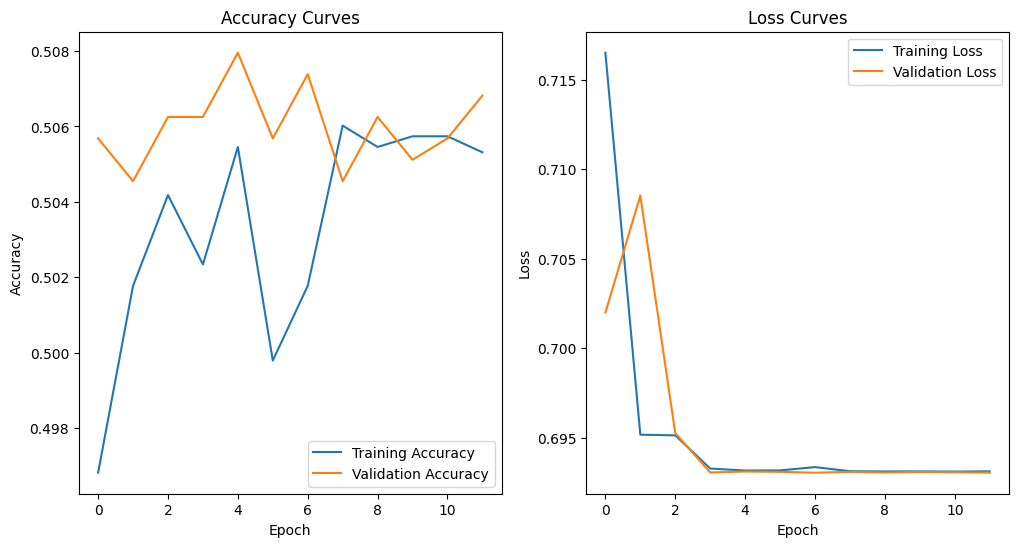

19/19 [==============================] - 3s 137ms/step - loss: 0.6915 - accuracy: 0.6000
Test accuracy: 0.6000000238418579
19/19 [==============================] - 3s 71ms/step
Classification Report for Test Dataset:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       360
           1       0.00      0.00      0.00       240

    accuracy                           0.60       600
   macro avg       0.30      0.50      0.37       600
weighted avg       0.36      0.60      0.45       600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


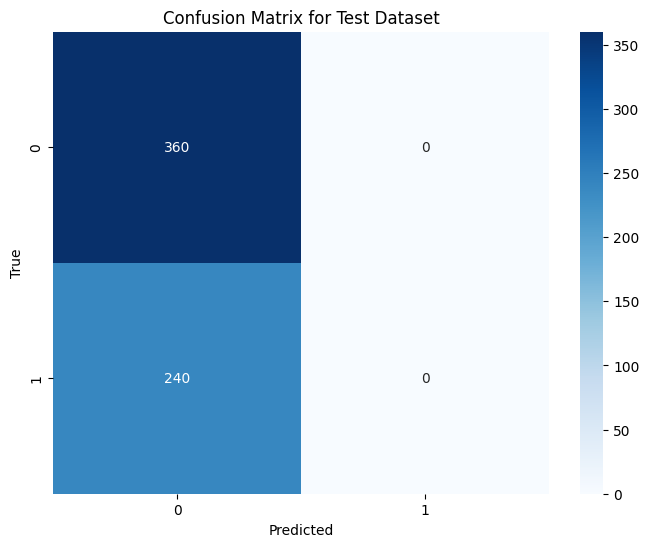

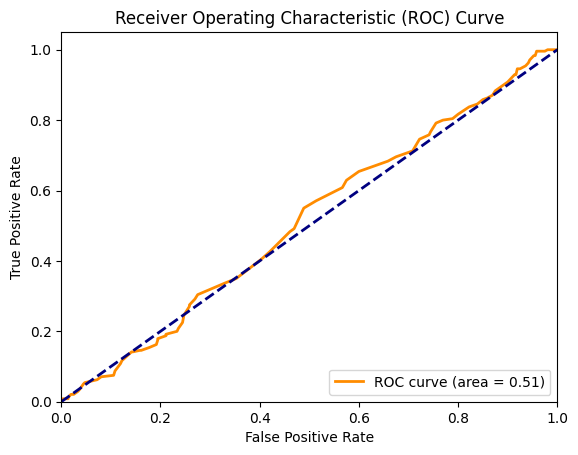

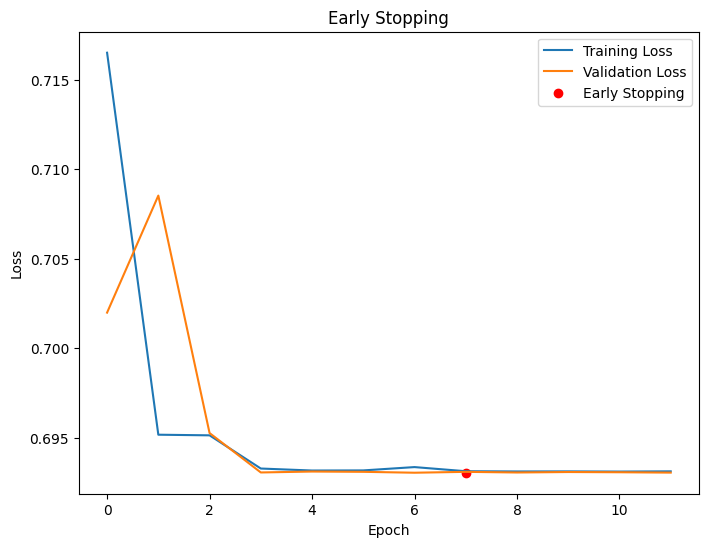

In [ ]:
##EfficientNetB0-2019
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

def load_data(train_dir, test_dir, image_size=(224, 224), batch_size=32, epochs=10):
    # Define data generators for train and test
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
    )

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training'
    )

    val_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation'
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary'
    )

    return train_generator, val_generator, test_generator

def build_model(input_shape=(224, 224, 3)):
    backbone = EfficientNetB0(input_shape=input_shape, include_top=False, weights='imagenet')
    backbone.trainable = False

    model = Sequential([
        backbone,
        GlobalAveragePooling2D(),
        Dense(1024, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

def train_model(model, train_generator, val_generator, epochs=10):
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        epochs=epochs,
        validation_data=val_generator,
        validation_steps=val_generator.samples // val_generator.batch_size,
        callbacks=[early_stopping]
    )

    return history

def evaluate_model(model, test_generator):
    test_loss, test_acc = model.evaluate(test_generator)
    print(f'Test accuracy: {test_acc}')

    predictions = model.predict(test_generator)
    y_pred = np.where(predictions > 0.5, 1, 0)
    y_true = test_generator.classes[:len(y_pred)]

    print("Classification Report for Test Dataset:")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title('Confusion Matrix for Test Dataset')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, predictions)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

def plot_metrics(history):
    plt.figure(figsize=(12, 6))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curves')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Curves')
    plt.legend()

    plt.show()

def plot_early_stopping(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.scatter(np.argmin(history.history["val_loss"]) + 1, np.min(history.history["val_loss"]), color='r', label='Early Stopping')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Early Stopping')
    plt.legend()
    plt.show()

def main():
    train_dir = '/content/archive (6)/train'
    test_dir = '/content/archive (6)/val'

    train_generator, val_generator, test_generator = load_data(train_dir, test_dir)
    model = build_model()

    # Set the number of epochs to 25
    epochs = 25

    history = train_model(model, train_generator, val_generator, epochs=epochs)

    # Plot accuracy and loss curves
    plot_metrics(history)

    evaluate_model(model, test_generator)

    # Plot early stopping
    plot_early_stopping(history)

if __name__ == "__main__":
    main()


Found 7091 images belonging to 2 classes.
Found 1772 images belonging to 2 classes.
Epoch 1/25
222/222 [==============================] - ETA: 0s - loss: 0.7200 - accuracy: 0.5245
Epoch 1: val_accuracy improved from -inf to 0.52314, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


222/222 [==============================] - 61s 259ms/step - loss: 0.7200 - accuracy: 0.5245 - val_loss: 0.6836 - val_accuracy: 0.5231
Epoch 2/25
222/222 [==============================] - ETA: 0s - loss: 0.6774 - accuracy: 0.5611
Epoch 2: val_accuracy improved from 0.52314 to 0.55023, saving model to best_model.h5
222/222 [==============================] - 43s 193ms/step - loss: 0.6774 - accuracy: 0.5611 - val_loss: 0.6813 - val_accuracy: 0.5502
Epoch 3/25
222/222 [==============================] - ETA: 0s - loss: 0.6619 - accuracy: 0.5950
Epoch 3: val_accuracy did not improve from 0.55023
222/222 [==============================] - 43s 192ms/step - loss: 0.6619 - accuracy: 0.5950 - val_loss: 0.7214 - val_accuracy: 0.4757
Epoch 4/25
222/222 [==============================] - ETA: 0s - loss: 0.6468 - accuracy: 0.6249
Epoch 4: val_accuracy did not improve from 0.55023
222/222 [==============================] - 43s 192ms/step - loss: 0.6468 - accuracy: 0.6249 - val_loss: 0.7451 - val_accur

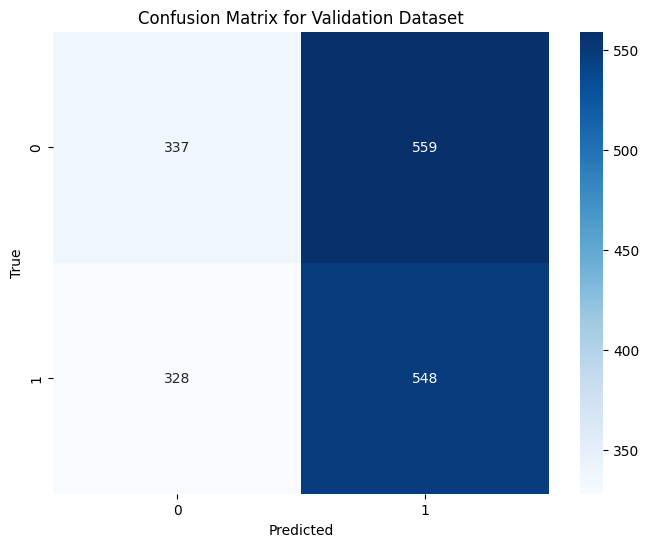

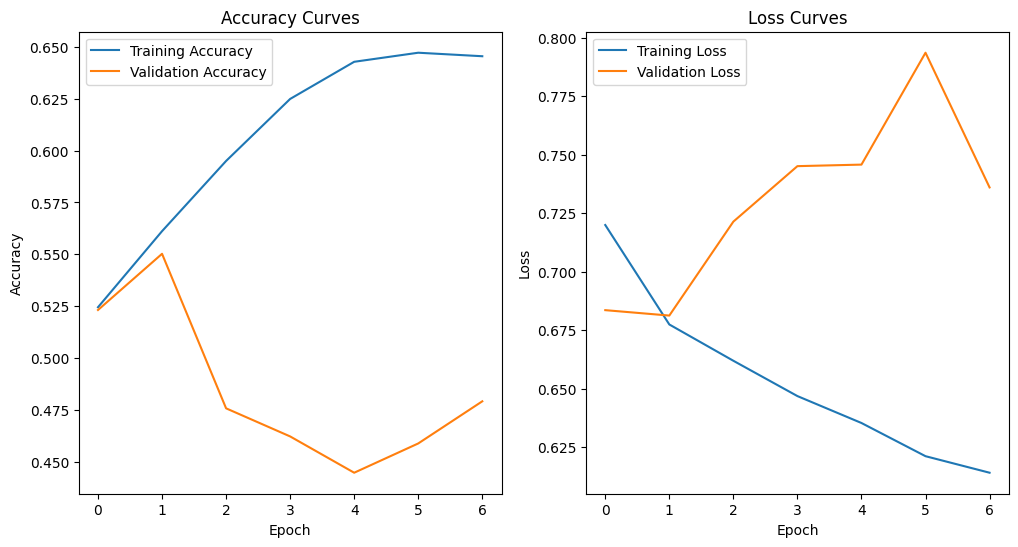

56/56 [==============================] - 9s 151ms/step


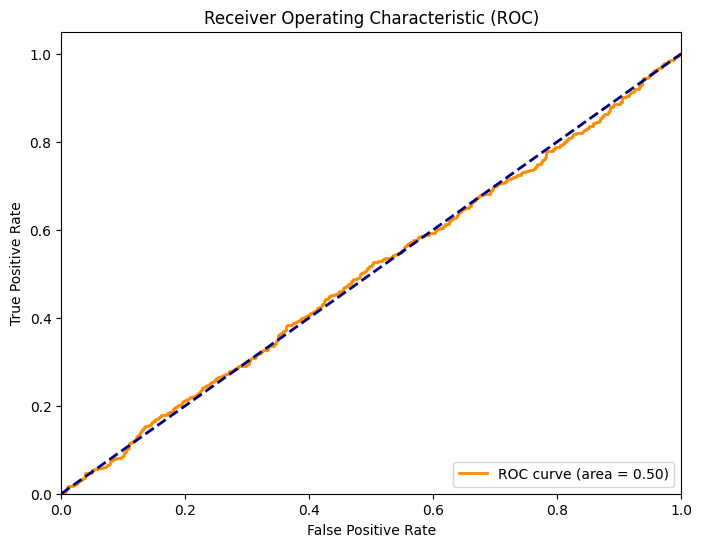

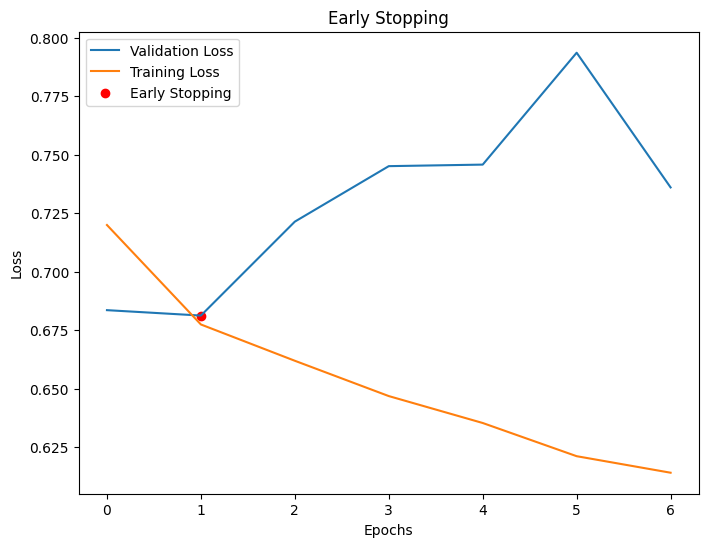

In [ ]:
#Perceiver model- 2021
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Flatten, LayerNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split

def load_data(train_dir, validation_dir, image_size=(128, 128), batch_size=32):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
    )

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training'
    )

    validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation'
    )

    return train_generator, validation_generator

def build_perceiver(input_shape=(128, 128, 3), num_classes=1):
    inputs = Input(shape=input_shape)
    x = inputs

    # Flatten the input
    x = Flatten()(x)

    # MLP Encoder
    for _ in range(2):  # Reduced to 2 layers for simplicity
        x = Dense(256, activation='relu')(x)
        x = LayerNormalization()(x)

    # Classification head
    outputs = Dense(num_classes, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    return model

def train_model(model, train_generator, validation_generator, epochs=10):
    model.compile(optimizer=Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, restore_best_weights=True)

    history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[checkpoint, early_stopping]
    )

    return history

def evaluate_model(model, validation_generator):
    predictions = model.predict(validation_generator)
    y_pred = np.where(predictions > 0.5, 1, 0)
    y_true = validation_generator.classes[:len(y_pred)]

    print("Classification Report for Validation Dataset:")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title('Confusion Matrix for Validation Dataset')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def plot_metrics(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curves')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Curves')
    plt.legend()

    plt.show()

def plot_roc(model, validation_generator):
    predictions = model.predict(validation_generator)
    fpr, tpr, _ = roc_curve(validation_generator.classes, predictions)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

def plot_early_stopping(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Early Stopping')
    plt.legend()
    plt.scatter(np.argmin(history.history['val_loss']), np.min(history.history['val_loss']), color='red', label='Early Stopping')
    plt.legend()
    plt.show()

def main():
    train_dir = '/content/archive (6)/train'
    validation_dir = '/content/archive (6)/val'

    train_generator, validation_generator = load_data(train_dir, validation_dir)
    model = build_perceiver()

    epochs = 25  # Increase epochs for more training
    history = train_model(model, train_generator, validation_generator, epochs=epochs)

    evaluate_model(model, validation_generator)
    plot_metrics(history)
    plot_roc(model, validation_generator)
    plot_early_stopping(history)

if __name__ == "__main__":
    main()


Found 7091 images belonging to 2 classes.
Found 1772 images belonging to 2 classes.
Epoch 1/25
222/222 [==============================] - ETA: 0s - loss: 0.7588 - accuracy: 0.5432
Epoch 1: val_accuracy improved from -inf to 0.27032, saving model to best_model.h5
222/222 [==============================] - 105s 454ms/step - loss: 0.7588 - accuracy: 0.5432 - val_loss: 0.8421 - val_accuracy: 0.2703
Epoch 2/25


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


222/222 [==============================] - ETA: 0s - loss: 0.6738 - accuracy: 0.5687
Epoch 2: val_accuracy improved from 0.27032 to 0.38657, saving model to best_model.h5
222/222 [==============================] - 108s 486ms/step - loss: 0.6738 - accuracy: 0.5687 - val_loss: 0.7951 - val_accuracy: 0.3866
Epoch 3/25
222/222 [==============================] - ETA: 0s - loss: 0.6702 - accuracy: 0.5700
Epoch 3: val_accuracy did not improve from 0.38657
222/222 [==============================] - 100s 451ms/step - loss: 0.6702 - accuracy: 0.5700 - val_loss: 0.8624 - val_accuracy: 0.2912
Epoch 4/25
222/222 [==============================] - ETA: 0s - loss: 0.6653 - accuracy: 0.5733
Epoch 4: val_accuracy did not improve from 0.38657
222/222 [==============================] - 100s 451ms/step - loss: 0.6653 - accuracy: 0.5733 - val_loss: 0.9481 - val_accuracy: 0.3290
Epoch 5/25
222/222 [==============================] - ETA: 0s - loss: 0.6709 - accuracy: 0.5766
Epoch 5: val_accuracy improved fro

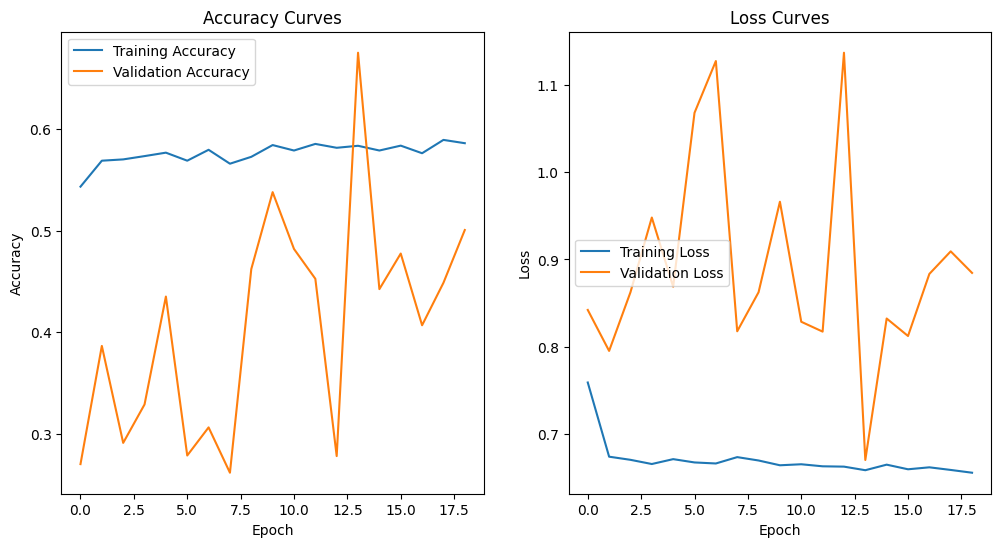

56/56 [==============================] - 13s 230ms/step


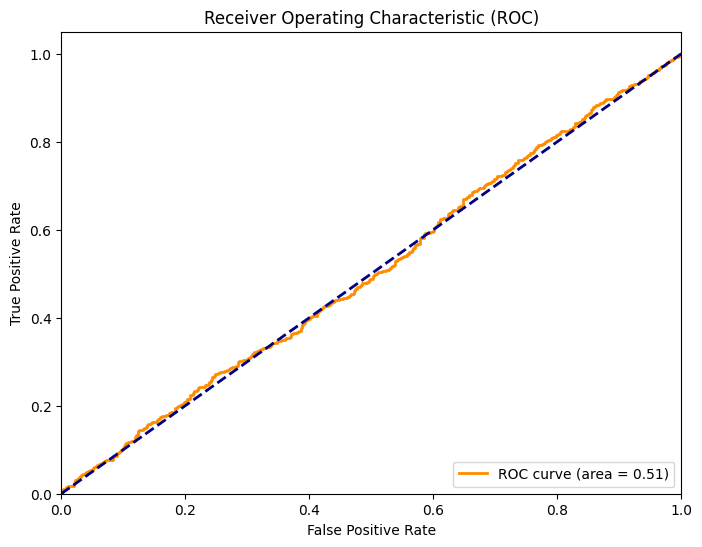

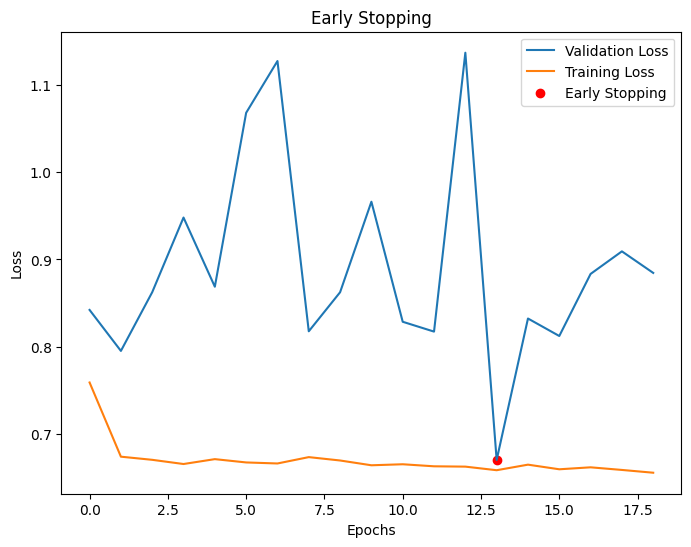

56/56 [==============================] - 13s 233ms/step
Classification Report for Validation Dataset:
              precision    recall  f1-score   support

           0       0.51      0.56      0.53       896
           1       0.50      0.44      0.47       876

    accuracy                           0.50      1772
   macro avg       0.50      0.50      0.50      1772
weighted avg       0.50      0.50      0.50      1772



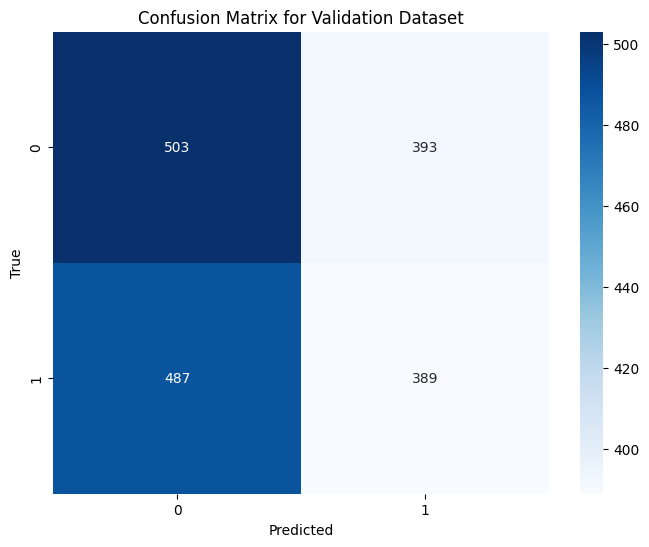

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split

def load_data(train_dir, validation_dir, image_size=(128, 128), batch_size=32):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
    )

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training'
    )

    validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation'
    )

    return train_generator, validation_generator

def build_mlp_mixer(input_shape=(128, 128, 3), num_classes=1):
    inputs = Input(shape=input_shape)
    x = inputs

    # Tokenization
    x = Dense(128)(x)

    # MLP Mixer layers
    for _ in range(2):  # Reduced to 2 mixer layers
        # Mixer layer
        y = LayerNormalization()(x)
        y = Dense(256, activation='relu')(y)
        y = Dropout(0.5)(y)
        y = Dense(128)(y)
        x = x + y

        # Per-patch fully connected layer
        y = Dense(128)(x)
        x = x + y

    # Global Average Pooling
    x = GlobalAveragePooling2D()(x)

    # Classification head
    outputs = Dense(num_classes, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    return model

def train_model(model, train_generator, validation_generator, epochs=10):
    model.compile(optimizer=Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, restore_best_weights=True)

    history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[checkpoint, early_stopping]
    )

    return history

def evaluate_model(model, validation_generator):
    predictions = model.predict(validation_generator)
    y_pred = np.where(predictions > 0.5, 1, 0)
    y_true = validation_generator.classes[:len(y_pred)]

    print("Classification Report for Validation Dataset:")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title('Confusion Matrix for Validation Dataset')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def plot_metrics(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curves')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Curves')
    plt.legend()

    plt.show()

def plot_roc(model, validation_generator):
    predictions = model.predict(validation_generator)
    fpr, tpr, _ = roc_curve(validation_generator.classes, predictions)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

def plot_early_stopping(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Early Stopping')
    plt.legend()
    plt.scatter(np.argmin(history.history['val_loss']), np.min(history.history['val_loss']), color='red', label='Early Stopping')
    plt.legend()
    plt.show()

def main():
    train_dir = '/content/archive (6)/train'
    validation_dir = '/content/archive (6)/val'

    train_generator, validation_generator = load_data(train_dir, validation_dir)
    model = build_mlp_mixer()

    epochs = 25  # Increase epochs for more training
    history = train_model(model, train_generator, validation_generator, epochs=epochs)

    plot_metrics(history)
    plot_roc(model, validation_generator)
    plot_early_stopping(history)

    evaluate_model(model, validation_generator)

if __name__ == "__main__":
    main()


Found 7091 images belonging to 2 classes.
Found 1772 images belonging to 2 classes.
87910968/87910968 [==============================] - 4s 0us/step
Epoch 1/25
222/222 [==============================] - ETA: 0s - loss: 0.6578 - accuracy: 0.6338
Epoch 1: val_accuracy improved from -inf to 0.51411, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


222/222 [==============================] - 188s 634ms/step - loss: 0.6578 - accuracy: 0.6338 - val_loss: 1.0431 - val_accuracy: 0.5141
Epoch 2/25
222/222 [==============================] - ETA: 0s - loss: 0.2804 - accuracy: 0.8851
Epoch 2: val_accuracy improved from 0.51411 to 0.62133, saving model to best_model.h5
222/222 [==============================] - 136s 614ms/step - loss: 0.2804 - accuracy: 0.8851 - val_loss: 2.2666 - val_accuracy: 0.6213
Epoch 3/25
222/222 [==============================] - ETA: 0s - loss: 0.1392 - accuracy: 0.9484
Epoch 3: val_accuracy improved from 0.62133 to 0.67720, saving model to best_model.h5
222/222 [==============================] - 133s 597ms/step - loss: 0.1392 - accuracy: 0.9484 - val_loss: 1.3748 - val_accuracy: 0.6772
Epoch 4/25
222/222 [==============================] - ETA: 0s - loss: 0.0785 - accuracy: 0.9733
Epoch 4: val_accuracy improved from 0.67720 to 0.68679, saving model to best_model.h5
222/222 [==============================] - 152s 6

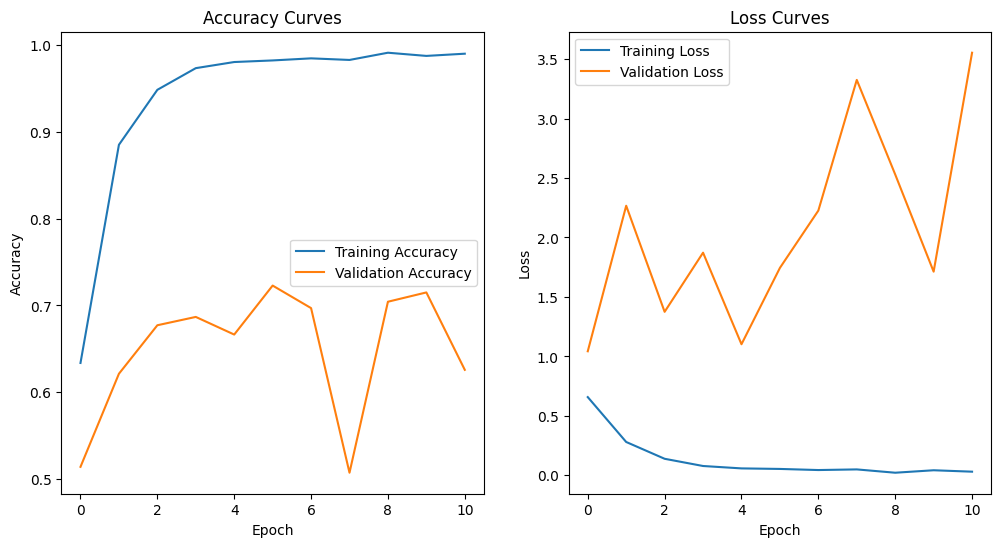

56/56 [==============================] - 24s 404ms/step
Classification Report for Validation Dataset:
              precision    recall  f1-score   support

           0       0.52      0.67      0.58       896
           1       0.51      0.36      0.42       876

    accuracy                           0.51      1772
   macro avg       0.51      0.51      0.50      1772
weighted avg       0.51      0.51      0.50      1772



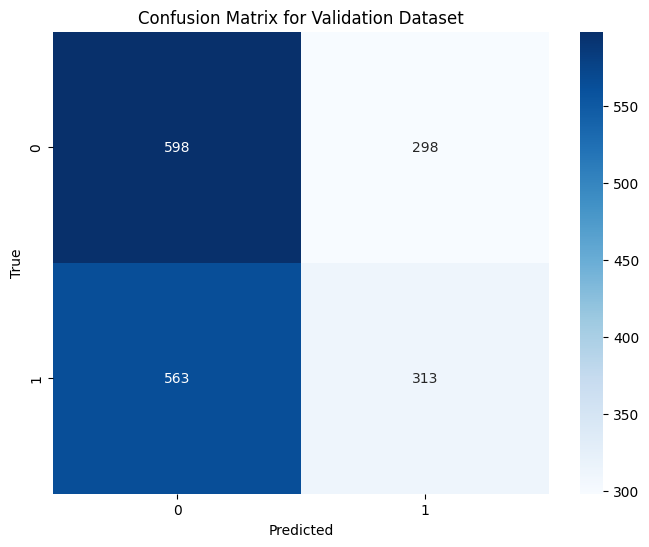

In [ ]:
#Googlenet
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split

def load_data(train_dir, validation_dir, image_size=(224, 224), batch_size=32):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
    )

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training'
    )

    validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation'
    )

    return train_generator, validation_generator

def build_model(input_shape=(224, 224, 3), num_classes=1):
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='sigmoid')
    ])
    return model

def train_model(model, train_generator, validation_generator, epochs=10):
    model.compile(optimizer=Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, restore_best_weights=True)

    history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[checkpoint, early_stopping]
    )

    return history

def evaluate_model(model, validation_generator):
    predictions = model.predict(validation_generator)
    y_pred = np.where(predictions > 0.5, 1, 0)
    y_true = validation_generator.classes[:len(y_pred)]

    print("Classification Report for Validation Dataset:")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title('Confusion Matrix for Validation Dataset')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def plot_metrics(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curves')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Curves')
    plt.legend()

    plt.show()

def main():
    train_dir = '/content/archive (6)/train'
    validation_dir = '/content/archive (6)/val'

    train_generator, validation_generator = load_data(train_dir, validation_dir)
    model = build_model()

    epochs = 25  # Increase epochs for more training
    history = train_model(model, train_generator, validation_generator, epochs=epochs)

    plot_metrics(history)
    evaluate_model(model, validation_generator)

if __name__ == "__main__":
    main()


In [ ]:
#MobileNet
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications import MobileNet

def load_data(train_dir, validation_dir, image_size=(224, 224), batch_size=32):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
    )

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training'
    )

    validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation'
    )

    return train_generator, validation_generator

def build_mobilenet(input_shape=(224, 224, 3), num_classes=1):
    base_model = MobileNet(include_top=False, weights='imagenet', input_shape=input_shape)
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(128, activation='relu')(x)  # Additional Dense layer
    outputs = Dense(num_classes, activation='sigmoid')(x)
    model = Model(base_model.input, outputs)
    return model

def train_model(model, train_generator, validation_generator, epochs=10):
    model.compile(optimizer=Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, restore_best_weights=True)

    history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[checkpoint, early_stopping]
    )

    return history

def evaluate_model(model, validation_generator):
    predictions = model.predict(validation_generator)
    y_pred = np.where(predictions > 0.5, 1, 0)
    y_true = validation_generator.classes[:len(y_pred)]

    print("Classification Report for Validation Dataset:")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title('Confusion Matrix for Validation Dataset')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def plot_metrics(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curves')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Curves')
    plt.legend()

    plt.show()

def main():
    train_dir = '/content/archive (6)/train'
    validation_dir = '/content/archive (6)/val'

    train_generator, validation_generator = load_data(train_dir, validation_dir)
    model = build_mobilenet()

    epochs = 25  # Increase epochs for more training
    history = train_model(model, train_generator, validation_generator, epochs=epochs)

    plot_metrics(history)
    evaluate_model(model, validation_generator)

if __name__ == "__main__":
    main()


Found 7091 images belonging to 2 classes.
Found 1772 images belonging to 2 classes.
17225924/17225924 [==============================] - 2s 0us/step
Epoch 1/25
222/222 [==============================] - ETA: 0s - loss: 0.2145 - accuracy: 0.9086
Epoch 1: val_accuracy improved from -inf to 0.58691, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


222/222 [==============================] - 134s 534ms/step - loss: 0.2145 - accuracy: 0.9086 - val_loss: 3.2602 - val_accuracy: 0.5869
Epoch 2/25
222/222 [==============================] - ETA: 0s - loss: 0.0784 - accuracy: 0.9722
Epoch 2: val_accuracy improved from 0.58691 to 0.74944, saving model to best_model.h5
222/222 [==============================] - 116s 524ms/step - loss: 0.0784 - accuracy: 0.9722 - val_loss: 1.0162 - val_accuracy: 0.7494
Epoch 3/25
222/222 [==============================] - ETA: 0s - loss: 0.0547 - accuracy: 0.9800
Epoch 3: val_accuracy did not improve from 0.74944
222/222 [==============================] - 115s 516ms/step - loss: 0.0547 - accuracy: 0.9800 - val_loss: 1.3838 - val_accuracy: 0.6998
Epoch 4/25
222/222 [==============================] - ETA: 0s - loss: 0.0353 - accuracy: 0.9869
Epoch 4: val_accuracy did not improve from 0.74944
222/222 [==============================] - 115s 518ms/step - loss: 0.0353 - accuracy: 0.9869 - val_loss: 1.6134 - val_a

Found 7091 images belonging to 2 classes.
Found 1772 images belonging to 2 classes.
Epoch 1/30
222/222 [==============================] - ETA: 0s - loss: 0.7467 - accuracy: 0.4974
Epoch 1: val_accuracy improved from -inf to 0.50564, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


222/222 [==============================] - 65s 249ms/step - loss: 0.7467 - accuracy: 0.4974 - val_loss: 0.6908 - val_accuracy: 0.5056
Epoch 2/30
222/222 [==============================] - ETA: 0s - loss: 0.6813 - accuracy: 0.5570
Epoch 2: val_accuracy improved from 0.50564 to 0.57393, saving model to best_model.h5
222/222 [==============================] - 55s 248ms/step - loss: 0.6813 - accuracy: 0.5570 - val_loss: 0.6784 - val_accuracy: 0.5739
Epoch 3/30
222/222 [==============================] - ETA: 0s - loss: 0.6614 - accuracy: 0.5879
Epoch 3: val_accuracy did not improve from 0.57393
222/222 [==============================] - 53s 241ms/step - loss: 0.6614 - accuracy: 0.5879 - val_loss: 0.6822 - val_accuracy: 0.5164
Epoch 4/30
222/222 [==============================] - ETA: 0s - loss: 0.6531 - accuracy: 0.6064
Epoch 4: val_accuracy did not improve from 0.57393
222/222 [==============================] - 66s 298ms/step - loss: 0.6531 - accuracy: 0.6064 - val_loss: 0.6760 - val_accur

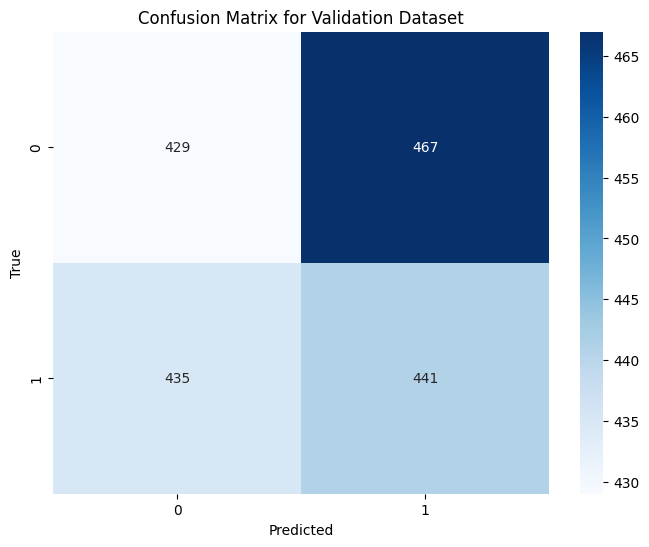

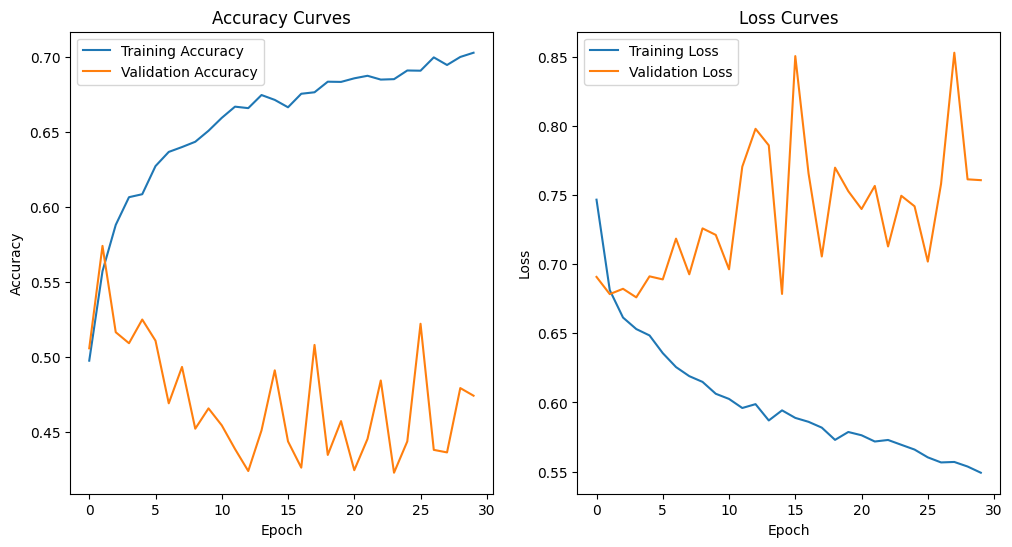

56/56 [==============================] - 11s 196ms/step


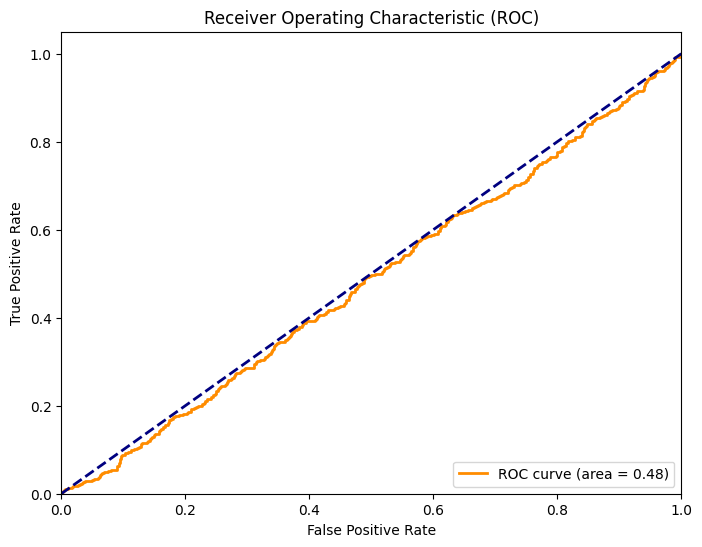

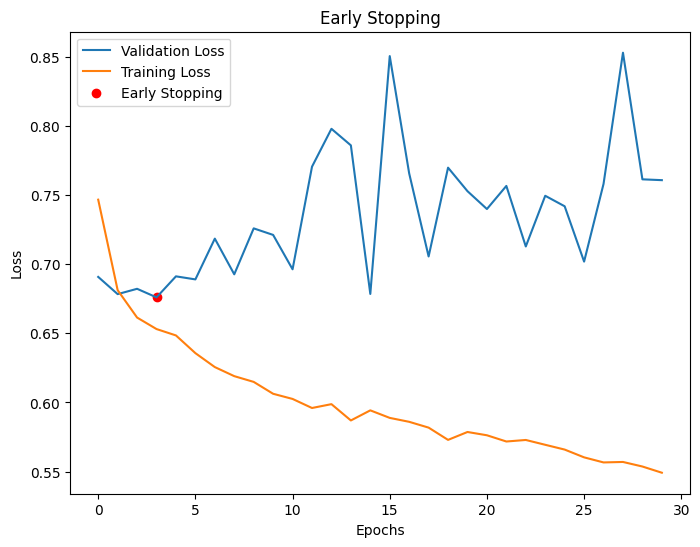

In [ ]:
#Peceiver model 2021
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Flatten, LayerNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

def load_data(train_dir, validation_dir, image_size=(128, 128), batch_size=32):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
    )

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training'
    )

    validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation'
    )

    return train_generator, validation_generator

def build_perceiver(input_shape=(128, 128, 3), num_classes=1):
    inputs = Input(shape=input_shape)
    x = inputs

    # Flatten the input
    x = Flatten()(x)

    # MLP Encoder
    for units in [256, 128, 1024, 256]:  # Added 256, 128, 1024, and a new layer
        x = Dense(units, activation='relu')(x)
        x = LayerNormalization()(x)

    # Classification head
    outputs = Dense(num_classes, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    return model

def train_model(model, train_generator, validation_generator, epochs=10):
    model.compile(optimizer=Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

    history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[checkpoint]
    )

    return history

def evaluate_model(model, validation_generator):
    predictions = model.predict(validation_generator)
    y_pred = np.where(predictions > 0.5, 1, 0)
    y_true = validation_generator.classes[:len(y_pred)]

    print("Classification Report for Validation Dataset:")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title('Confusion Matrix for Validation Dataset')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def plot_metrics(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curves')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Curves')
    plt.legend()

    plt.show()

def plot_roc(model, validation_generator):
    predictions = model.predict(validation_generator)
    fpr, tpr, _ = roc_curve(validation_generator.classes, predictions)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

def plot_early_stopping(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Early Stopping')
    plt.legend()
    plt.scatter(np.argmin(history.history['val_loss']), np.min(history.history['val_loss']), color='red', label='Early Stopping')
    plt.legend()
    plt.show()

def main():
    train_dir = '/content/archive (6)/train'
    validation_dir = '/content/archive (6)/val'

    train_generator, validation_generator = load_data(train_dir, validation_dir)
    model = build_perceiver()

    epochs = 30  # Increased epochs to 30
    history = train_model(model, train_generator, validation_generator, epochs=epochs)

    evaluate_model(model, validation_generator)
    plot_metrics(history)
    plot_roc(model, validation_generator)
    plot_early_stopping(history)  # No early stopping, but the plot will still show

if __name__ == "__main__":
    main()


Found 7091 images belonging to 2 classes.
Found 1772 images belonging to 2 classes.
Epoch 1/50
222/222 [==============================] - ETA: 0s - loss: 0.7418 - accuracy: 0.5067
Epoch 1: val_accuracy improved from -inf to 0.55982, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


222/222 [==============================] - 143s 633ms/step - loss: 0.7418 - accuracy: 0.5067 - val_loss: 0.6829 - val_accuracy: 0.5598
Epoch 2/50
222/222 [==============================] - ETA: 0s - loss: 0.6782 - accuracy: 0.5545
Epoch 2: val_accuracy improved from 0.55982 to 0.58409, saving model to best_model.h5
222/222 [==============================] - 110s 496ms/step - loss: 0.6782 - accuracy: 0.5545 - val_loss: 0.6685 - val_accuracy: 0.5841
Epoch 3/50
222/222 [==============================] - ETA: 0s - loss: 0.6634 - accuracy: 0.5948
Epoch 3: val_accuracy did not improve from 0.58409
222/222 [==============================] - 119s 535ms/step - loss: 0.6634 - accuracy: 0.5948 - val_loss: 0.6904 - val_accuracy: 0.5073
Epoch 4/50
222/222 [==============================] - ETA: 0s - loss: 0.6482 - accuracy: 0.6160
Epoch 4: val_accuracy did not improve from 0.58409
222/222 [==============================] - 112s 504ms/step - loss: 0.6482 - accuracy: 0.6160 - val_loss: 0.7052 - val_a

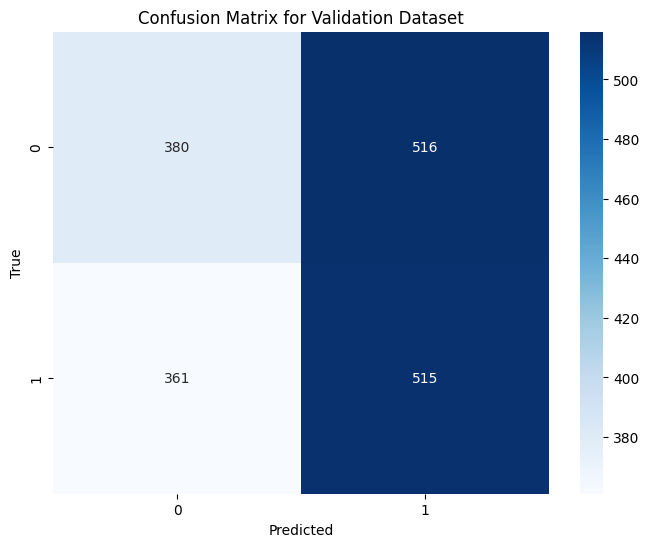

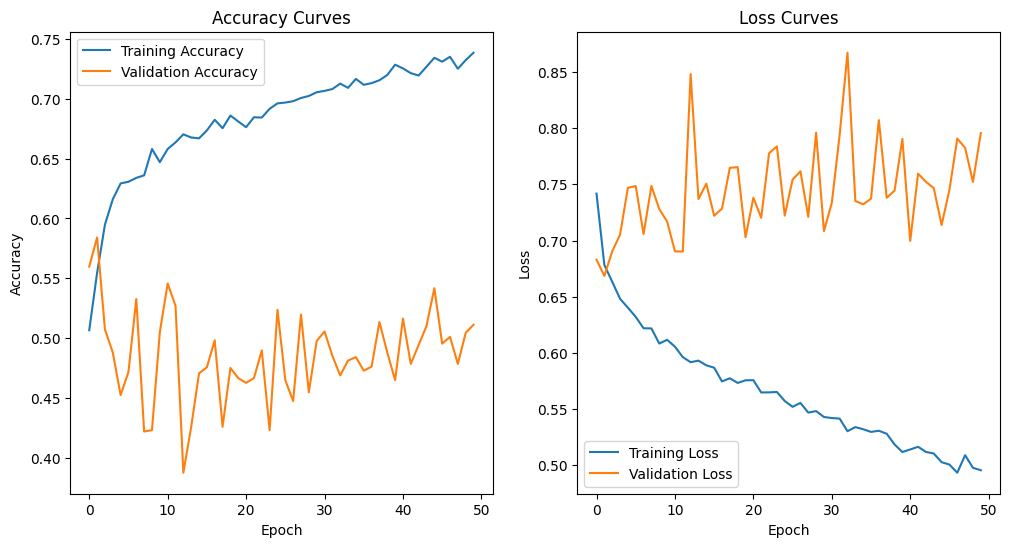

In [ ]:
#perceiver
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, auc, roc_curve
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Flatten, LayerNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

def load_data(train_dir, validation_dir, image_size=(128, 128), batch_size=32):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
    )

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training'
    )

    validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation'
    )

    return train_generator, validation_generator

def build_perceiver(input_shape=(128, 128, 3), num_classes=1):
    inputs = Input(shape=input_shape)
    x = inputs

    # Flatten the input
    x = Flatten()(x)

    # MLP Encoder
    for units in [256, 128, 1024, 256]:
        x = Dense(units, activation='relu')(x)
        x = LayerNormalization()(x)

    # Classification head
    outputs = Dense(num_classes, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    return model

def train_model(model, train_generator, validation_generator, epochs=10):
    model.compile(optimizer=Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

    history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[checkpoint]
    )

    return history

def evaluate_model(model, validation_generator):
    predictions = model.predict(validation_generator)
    y_pred = np.where(predictions > 0.5, 1, 0)
    y_true = validation_generator.classes[:len(y_pred)]

    print("Classification Report for Validation Dataset:")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title('Confusion Matrix for Validation Dataset')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def plot_metrics(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curves')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Curves')
    plt.legend()

    plt.show()

def main():
    train_dir = '/content/archive (6)/train'
    validation_dir = '/content/archive (6)/val'

    train_generator, validation_generator = load_data(train_dir, validation_dir)
    model = build_perceiver()

    epochs = 50  # Increased epochs to 50
    history = train_model(model, train_generator, validation_generator, epochs=epochs)

    evaluate_model(model, validation_generator)
    plot_metrics(history)

if __name__ == "__main__":
    main()


In [ ]:
#MLP MIxer model
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

def load_data(train_dir, validation_dir, image_size=(128, 128), batch_size=32):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
    )

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training'
    )

    validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation'
    )

    return train_generator, validation_generator

def build_mlp_mixer(input_shape=(128, 128, 3), num_classes=1):
    inputs = Input(shape=input_shape)
    x = inputs

    # Tokenization
    x = Dense(128)(x)

    # MLP Mixer layers with additional dense layers
    for _ in range(2):  # Reduced to 2 mixer layers
        # Mixer layer
        y = LayerNormalization()(x)
        y = Dense(256, activation='relu')(y)
        y = Dropout(0.5)(y)
        y = Dense(128)(y)
        x = x + y

        # Per-patch fully connected layer
        y = Dense(128)(x)
        x = x + y

    # Additional dense layers
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(128)(x)

    # Global Average Pooling
    x = GlobalAveragePooling2D()(x)

    # Classification head
    outputs = Dense(num_classes, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    return model

def train_model(model, train_generator, validation_generator, epochs=10):
    model.compile(optimizer=Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

    history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[checkpoint]
    )

    return history

def evaluate_model(model, validation_generator):
    predictions = model.predict(validation_generator)
    y_pred = np.where(predictions > 0.5, 1, 0)
    y_true = validation_generator.classes[:len(y_pred)]

    print("Classification Report for Validation Dataset:")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title('Confusion Matrix for Validation Dataset')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def plot_metrics(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curves')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Curves')
    plt.legend()

    plt.show()

def main():
    train_dir = '/content/archive (6)/train'
    validation_dir = '/content/archive (6)/val'

    train_generator, validation_generator = load_data(train_dir, validation_dir)
    model = build_mlp_mixer()

    epochs = 30  # Increase epochs for more training
    history = train_model(model, train_generator, validation_generator, epochs=epochs)

    plot_metrics(history)

    evaluate_model(model, validation_generator)

if __name__ == "__main__":
    main()


Found 7091 images belonging to 2 classes.
Found 1772 images belonging to 2 classes.
Epoch 1/30
222/222 [==============================] - ETA: 0s - loss: 0.7147 - accuracy: 0.5228 
Epoch 1: val_accuracy improved from -inf to 0.50564, saving model to best_model.h5
222/222 [==============================] - 7639s 34s/step - loss: 0.7147 - accuracy: 0.5228 - val_loss: 0.7036 - val_accuracy: 0.5056


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/30
 43/222 [====>.........................] - ETA: 1:33:43 - loss: 0.6813 - accuracy: 0.5298